# Import & Read CSVs #

In [1]:
import pandas as pd
pd.set_option('max_row', None)
pd.set_option('max_columns', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import numpy as np
from scipy import stats

from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time, urllib.request
import requests

import re
from collections import Counter

In [2]:
followerDF = pd.read_csv("./dataset/SCS/SCS_Followers.csv")
followingDF = pd.read_csv("./dataset/SCS/SCS_Followings.csv")
postDF = pd.read_csv("./dataset/SCS/allposts.csv")
# profileDF = pd.read_csv("./dataset/SCS/SCS_Followers.csv")
taggedpostDF = pd.read_csv("./dataset/SCS/taggedposts.csv")
commentDF = pd.read_csv("./dataset/SCS/comments.csv")


In [3]:
# print("\nProfile")
# display(profileDF.head())

print("Followerers")
display(followerDF.head())

print("\nFollowerings")
display(followingDF.head())

print("\nPosts")
display(postDF.head())

print("\nTagged Posts")
display(taggedpostDF.head())

print("\nComments")
display(commentDF.head())

Followerers


,profileUrl,username,fullName,imgUrl,id,isPrivate,isVerified,query,timestamp
0,https://www.instagram.com/ngsb5218_10,ngsb5218_10,Lim Yue Hang,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/15802928_1608514139455555_1510811122108727296_a.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=bsx2PtjfuUUAX9jftkf&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT_UST7F_m5nQfybW40H9enAdwWoanPAi5JFCfgX4umrgw&oe=6241164E&_nc_sid=e5d0a6,4338409078,False,False,https://www.instagram.com/sgchildrensoc/,2022-03-22T06:00:30.350Z
1,https://www.instagram.com/1027jun1999,1027jun1999,1027jun1999,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/272700453_119671873915657_5660291994718585108_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=101&_nc_ohc=FQTvgWS9aeUAX93ygXk&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT-Unzhkt2Tf7z_BLztViHffpV3OYYZ7AOXyJYz9l_p8eg&oe=623F709E&_nc_sid=e5d0a6,39128500724,True,False,https://www.instagram.com/sgchildrensoc/,2022-03-22T06:00:30.350Z
2,https://www.instagram.com/justcuzyouknow,justcuzyouknow,the1month1reply@1%one,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/274143723_351699353301864_1150186076252383797_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=100&_nc_ohc=MTGligo-BRMAX-R8ChW&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT8vee7gbgk_qkCLrSxsfSeFukdAmzAzfROl0vEe24L5Pg&oe=623FC1E1&_nc_sid=e5d0a6,48547816958,True,False,https://www.instagram.com/sgchildrensoc/,2022-03-22T06:00:30.350Z
3,https://www.instagram.com/a.k.s.h.a.y.a,a.k.s.h.a.y.a,🍒Akshaya🍒,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/273969056_364681945179469_5616738931654038032_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=101&_nc_ohc=FnxfgaG4y14AX8jfDTr&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT_FZt9LFxxbGVyKwX-QAm99B806NWZKr84v-C1PlsCYaA&oe=6241340B&_nc_sid=e5d0a6,1180206718,True,False,https://www.instagram.com/sgchildrensoc/,2022-03-22T06:00:30.350Z
4,https://www.instagram.com/jyxvox,jyxvox,Letter J & Y.,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/270052924_320599676633184_4129099018113724366_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=100&_nc_ohc=ApG4sYJhlsQAX9HyZ6f&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT95NyaSjFxcq19t_9fV9KH8HgjUzYi7PkunxA5fvXvHWw&oe=62401AD5&_nc_sid=e5d0a6,45620521252,True,False,https://www.instagram.com/sgchildrensoc/,2022-03-22T06:00:30.350Z



Followerings


,profileUrl,username,fullName,imgUrl,id,isPrivate,isVerified,query,timestamp
0,https://www.instagram.com/_iamstanz_,_iamstanz_,Stanley Tan,https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-19/244699140_291135079494742_8192659078712632394_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=8MWLuZCLZOkAX9giyhQ&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT_KvbUqQbKuFJdJBL0yafF3gVgtxEZ6uHq_exPSY9_hKg&oe=6240AA06&_nc_sid=04cb80,1930845621,True,False,https://www.instagram.com/sgchildrensoc/,2022-03-23T02:50:05.045Z
1,https://www.instagram.com/pandadl,pandadl,Deryk | 데릭,https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-19/156345508_914500785989904_7170379495272273282_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=100&_nc_ohc=HZ11K6vVNqIAX_ZD2Y7&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT_FpF2nYWfomGwDlZ3-o1EC7L51UX-3LZd_5IYFdgUaLA&oe=62412112&_nc_sid=04cb80,39223755,False,False,https://www.instagram.com/sgchildrensoc/,2022-03-23T02:50:05.045Z
2,https://www.instagram.com/vox.44cc,vox.44cc,VOX @ Children’s Society,https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-19/133679077_410986999952710_8017442924617569609_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=ujSrWCt7I9oAX8wLQ63&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT9NYJTGQrM_k8BTu2vHR2WT83mh5Ma3nyaLhHQPzxXxEA&oe=6240BEEC&_nc_sid=04cb80,1834768088,False,False,https://www.instagram.com/sgchildrensoc/,2022-03-23T02:50:05.045Z
3,https://www.instagram.com/jremytay,jremytay,J to the Remy,https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-19/271288059_249543197170009_5113150383435718987_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=101&_nc_ohc=N4e8Mppvfc8AX_sVhwd&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT9SEo0QES4xCKOFn_V9MMGyxX-hWMEFkQVTAJqouOrJMg&oe=6241E42B&_nc_sid=04cb80,194190647,True,False,https://www.instagram.com/sgchildrensoc/,2022-03-23T02:50:05.045Z
4,https://www.instagram.com/erviano__,erviano__,Ervin Lim,https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-19/67491268_2325811797747950_9004265547264688128_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=102&_nc_ohc=mLGYP8CuIIcAX-lKOYO&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT8He1NMPsaOBqYWZlwVhDfIO8yrGvSnHk7WA4Nyr4bJ5g&oe=624194CB&_nc_sid=04cb80,453618877,False,False,https://www.instagram.com/sgchildrensoc/,2022-03-23T02:50:05.045Z



Posts


,postUrl,description,commentCount,likeCount,pubDate,likedByViewer,isSidecar,type,profileUrl,username,fullName,imgUrl,postId,timestamp,query,videoUrl,viewCount,taggedFullName1,taggedUsername1,taggedFullName2,taggedUsername2,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,location,locationId
0,https://www.instagram.com/p/CbZBDq6rRnv/,"Today is World Water Day. To raise awareness about water conservation, our youth beneficiaries from JYC @ Children’s Society teamed up with senior rowers from SG Dragons to clean up Lower Seletar Reservoir on 16 March. As Dan Wen, one of our beneficiaries who took part in the cleanup, put it : “I had a lot of fun during the kayaking and cleanup…I feel happy to not only enjoy myself during the event but also helping the environment’. Thanks to the organisers Camelot Singapore and PUB for giving our beneficiaries the chance to be a part of this meaningful event. Read the article through the link in our bio @sgchildrensoc \n\n#makeeverydropcount #goblue4SG @pubsingapore @jyc_at_scs",0,12,2022-03-22T03:23:22.000Z,False,False,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,Singapore Children's Society,https://scontent-iad3-1.cdninstagram.com/v/t51.2885-15/276320951_5318774158133990_2946518633320796691_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-iad3-1.cdninstagram.com&_nc_cat=102&_nc_ohc=9JaM2AGenK4AX-FvjO8&edm=AABBvjUBAAAA&ccb=7-4&ig_cache_key=Mjc5OTI3MzI5MzY3Mzk5NDczNQ%3D%3D.2-ccb7-4&oh=00_AT8iXTEZYjkhV5aLbj1I89RcoKUo119l5MTCdh1EeP_17A&oe=62404980&_nc_sid=83d603,2799273293673994735_1646646616,2022-03-22T04:33:24.708Z,https://www.instagram.com/sgchildrensoc/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CbW1HoSrDt0/,"“Hello, I’m Tinkle Friend! What would you like to talk about today?”\n\nDo you enjoy chatting with children? Are you able to listen and empathise with others? We are currently recruiting volunteers to man our Tinkle Friend helpline and online chat for primary school children in Singapore! Tinkle Friend volunteers offer a listening ear to children who call in or chat with us online about their issues and concerns.\n\nIf you are 21 years old and above and keen to be a Tinkle Friend volunteer, you can find out more and register through the link in our bio @sgchildrensoc\n\nPlease contact the Tinkle Friend team at 6276 5077 from Monday to Friday, 8.30am to 5.30pm and/or email us at tinklefriend@childrensociety.org.sg if you have any queries about the volunteering opportunity.\n\nWe hope to welcome you into our Tinkle Friend family 😊\n\n#tinklefriend #sgvolunteer",0,36,2022-03-21T07:00:34.000Z,False,False,Photo,https://www.instagram.com/sgchildrensoc,sgchildrensoc,Singapore Children's Society,https://scontent-iad3-1.cdninstagram.com/v/t51.2885-15/277037018_4842890192505570_4410851048712852144_n.jpg?stp=dst-jpg_e15_fr_s1080x1080&_nc_ht=scontent-iad3-1.cdninstagram.com&_nc_cat=106&_nc_ohc=66U6WY5-DXIAX84m7vD&edm=AABBvjUBAAAA&ccb=7-4&ig_cache_key=Mjc5ODY1NzgzOTIyMTcxNzg3Ng%3D%3D.2-ccb7-4&oh=00_AT8fMrVe0ejrGZR1UmxEOIs76JsSrSY6JZHiM8ZR4iyfOA&oe=6240F4AF&_nc_sid=83d603,2798657839221717876_1646646616,2022-03-22T04:33:24.880Z,https://www.instagram.com/sgchildrensoc/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CbHbKk2rDGb/,"It is World Social Work Day today! We invited Ms Tan Bee Joo, Senior Director and Group Lead of Family Services to share more about her 24-year journey with Singapore Children’s Society.\n \nIn her starting years, she was involved with casework and counselling for low-income families and had also worked with youth in Project CABIN – drop-in centres in secondary schools for students to have a conducive environment to hangout after school hours. She led projects such as the Bully Free programme and Tinkle Friend as she took on a managerial role, and today, she continues to serve vulnerable families and their children in the Yishun community.\n \nSwipe to see some of the many memorable moments Bee Jo


Tagged Posts


,postUrl,profileUrl,username,likeCount,commentCount,caption,pubDate,description,location,locationId,type,taggedFullName1,taggedUsername1,taggedFullName2,taggedUsername2,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,taggedFullName5,taggedUsername5,taggedFullName6,taggedUsername6,taggedFullName7,taggedUsername7,taggedFullName8,taggedUsername8,taggedFullName9,taggedUsername9,taggedFullName10,taggedUsername10,taggedFullName11,taggedUsername11,taggedFullName12,taggedUsername12,taggedFullName13,taggedUsername13,taggedFullName14,taggedUsername14,taggedFullName15,taggedUsername15,taggedFullName16,taggedUsername16,taggedFullName17,taggedUsername17,taggedFullName18,taggedUsername18,taggedFullName19,taggedUsername19,taggedFullName20,taggedUsername20,id,timestamp,query,viewCount,taggedFullName21,taggedUsername21,taggedFullName22,taggedUsername22,taggedFullName23,taggedUsername23
0,https://www.instagram.com/p/CZLsqK4PuYE/,https://www.instagram.com/daughtersoftomorrow,daughtersoftomorrow,23,0,NaN,2022-01-26T06:12:12.000Z,"🗣 Open for applications 🗣\n\nAre you working in the eldercare or childcare sectors? 🧸 Do you need extra support to upskill at work? 🗂\n\nApply for the Transformation Fund and get your training sponsored! \n\nAt DOT, we believe that education is key in the economic empowerment of women 💪🏼\n\nClick the link in our bio or scan the QR code at the end for more information.\n\n#empoweringwomen #enablingfamilies #TransformationFund #economicempowerment #upskilling #DOTEmpower",Singapore / Singapura / 新加坡 / சிங்கப்பூர்,1.140693e+14,Photo,SINDA,mysinda,Thye Hua Kwan Moral Society,thk360,TOUCH Community Services,touchcommunityservices,Singapore Children's Society,sgchildrensoc,Methodist Welfare Services,mws.sg,PPIS Singapore,ppissg,Club Rainbow (Singapore),club.rainbow,Serangoon Moral FSC,serangoonmoralfsc,AWWA,awwasg,Fei Yue,feiyue.sg,South Central Community FSC,sccfsc,Care Corner Singapore,carecornersg,Lakeside Family Services,lakesidefamilyservices,Kreta Ayer Family Services,community_kakis,New Hope Community Services,nhcs.sg,Viriya Community Services,viriyacommunityservices,@27 Family Service Centre,27fsc,REACH Community Services,reachcommunitysvcs,Marine Parade FSC (MPFSC),marineparadefsc,Hougang Sheng Hong FSC,hshfsc,2759495608640136708_3962903522,2022-03-23T02:52:37.996Z,https://www.instagram.com/sgchildrensoc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CZYDGVOvc0K/,https://www.instagram.com/zillearnplus,zillearnplus,6,0,"Photo shared by ZilLearn Plus on January 30, 2022 tagging @newlifecommunityservices, @salvationarmyihq, @sgchildrensoc, @sgminds, @hagarsingapore, @daughtersoftomorrow, @parkinsonsocietysingapore, @awwasg, @scys.sg, @campusimpactsg, and @presidentschallengesg. May be an image of 1 person and text.",2022-01-31T01:19:10.000Z,"Ang paos aren't the only gifts you can give this Chinese New Year. \n\nSubscribe to ZilLearn Plus and share with your family and friends this festive season the convenience of online learning. One subscription plan at S$16.50 monthly unlocks access to more than 10,000 lessons to top workplace skills taught by industry experts. \n\nAnd in the spirit of giving, we will donate S$50 to any of our 12 community partners, each time they are nominated by a ZilLearn Plus subscriber. \n\nVisit plus.zillearn.com to know more.\n\n#zillionpossibilities #career #agility #possibilities #learning #neverstoplearning #zillearn #zillearnplus #accessible #empower #learn",NaN,NaN,Photo,New Life Community Services,newlifecommunityservices,The Salvation Army,salvationarmyihq,Singapore Children's Society,sgchildrensoc,MINDS,sgminds,Hagar Singapore,hagarsingapore,Daughters Of Tomorrow (DOT),daughtersoftomorrow,PSS,parkinsonsocietysingapore,AWWA,awwasg,SHINE,scys.sg,CampusImpact,campusimpactsg,President's Challenge,presidentschallengesg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2762972000644091146_28108432076,2022-03-23T02:52:37.996Z,https://www.instagr


Comments


,query,error,timestamp,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId
0,https://www.instagram.com/p/CbW1HoSrDt0/,No comments found,2022-03-22T04:16:29.731Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CbHbKk2rDGb/,NaN,2022-03-22T04:16:30.894Z,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-19/90742475_565511404083765_288949297842487296_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=109&_nc_ohc=yrbElkZ0oYIAX93rD1c&edm=AId3EpQBAAAA&ccb=7-4&oh=00_AT88nB8-Azeh8btu8OubzhPRMnjPOYhJ3aPG_DOKfSgRzg&oe=624055CB&_nc_sid=705020,jitkaurrr,https://www.instagram.com/jitkaurrr,👏👏,1.0,0.0,2022-03-18T00:35:55.000Z,1.794178e+16,3.226968e+10
2,https://www.instagram.com/p/CazGZk4PcV9/,No comments found,2022-03-22T04:16:31.314Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/Caoe0jUsfQh/,No comments found,2022-03-22T04:16:31.549Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/Cal6BHIPdm7/,No comments found,2022-03-22T04:16:31.779Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
postDF_gb = postDF.groupby(['postUrl', 'type'])

postDB_size = postDF_gb.size().reset_index(name = "count") 
postDB_size_duplicate = postDB_size[postDB_size.duplicated(keep=False, subset=['postUrl'])]
postDB_size_unique = postDB_size.drop_duplicates(subset=['postUrl'], keep=False)
postDF_agg = postDF_gb.agg({'likeCount': 'mean', 'viewCount': 'mean'}).rename(columns={'likeCount': 'likeMean','viewCount': 'viewMean'}).reset_index()

df_post_unique = postDF_agg[postDF_agg['postUrl'].isin(postDB_size_unique['postUrl'])].groupby(['type']).agg({'likeMean': 'mean', 'viewMean': 'mean'}).reset_index()
df_post_duplicate = postDF_agg[postDF_agg['postUrl'].isin(postDB_size_duplicate['postUrl'])].groupby(['type']).agg({'likeMean': 'mean', 'viewMean': 'mean'}).reset_index()

df_uniquePhoto = df_post_unique.loc[df_post_unique['type'] == 'Photo']
df_uniqueVideo = df_post_unique.loc[df_post_unique['type'] == 'Video']
df_hybrid = df_post_duplicate.loc[df_post_unique['type'] == 'Video']

# postDF_gb_overall = postDF_gb.size().to_frame(name='counts')
# postDF_gb_overall.join(postDF_gb.agg({'likeCount': 'mean'}).rename(columns={'likeCount': 'likeMean'})).join(postDF_gb.agg({'viewCount': 'mean'}).rename(columns={'viewCount': 'viewMean'})).reset_index()

In [5]:

df_uniquePhoto['likeMean'].values[0]
df_uniqueVideo['likeMean'].values[0]
df_uniqueVideo['viewMean'].values[0]

df_hybrid['likeMean'].values[0]
df_hybrid['viewMean'].values[0]


100.0

# Statistics #
1. send all comments to sentimental analysis (DONE)
2. word cloud on caption
3. timeseries chart-hastag, likes, content(post) (KINDA DONE)
4. statistics (follower/followering, avg media per post, number of photo, video) (DONE)
5. Users that like each posts (% of them followering) (DONE)
6. tagged post (DONE-semi)


In [6]:
# Helper Functions

def getFolloweringPercentage(arr1, arr2):
    count = 0
    count_arr = []
    
    for followering in arr1:
        if (followering in arr2):
            count += 1
            count_arr.append(followering)
    return count, count_arr

def getHashtag(arr):
    
    result = []
    
    for each_sentence in arr:
        result.extend(re.findall(r"#(\w+)", each_sentence))
    
    return result

def getHashtagdict(arr, unique):
    result = {}
    for word in unique:
        result[word] = arr.count(word)
    return result

In [7]:
# Store useful infomation in dictionary
statsDictionary = {}
statsDictionary["follower"] = followerDF["username"].unique().tolist()
statsDictionary["followerVerified"] = followerDF[followerDF["isVerified"]]["username"].unique().tolist()
statsDictionary["followerPrivate"] = followerDF[followerDF["isPrivate"]]["username"].unique().tolist()

statsDictionary["followering"] = followingDF["username"].unique().tolist()
statsDictionary["followeringVerified"] = followingDF[followingDF["isVerified"]]["username"].unique().tolist()
statsDictionary["followeringPrivate"] = followingDF[followingDF["isPrivate"]]["username"].unique().tolist()

statsDictionary["commentUser"] =  commentDF[commentDF["username"].notna()]["username"].unique().tolist()

statsDictionary["postHashtag"] =  getHashtag(postDF[postDF["description"].notna()]["description"].tolist())

In [ ]:
# Testing
commentDF[commentDF["username"].notna()]["username"].unique().tolist()

In [9]:
print("MFS Statistics")

# Followers statistics
print(f"Followers count: {len(statsDictionary['follower'])}")
print(f"Verified Followers count: {len(statsDictionary['followerVerified'])}, {len(statsDictionary['followerVerified'])/len(statsDictionary['follower'])*100:.2f}%")
print(f"Private Followers count: {len(statsDictionary['followerPrivate'])}, {len(statsDictionary['followerPrivate'])/len(statsDictionary['follower'])*100:.2f}%")
print("\n----------------------------------------------\n")

# Followerings statistics
print(f"Followings count: {len(statsDictionary['followering'])}")
print(f"Verified Followings count: {len(statsDictionary['followeringVerified'])}, {len(statsDictionary['followeringVerified'])/len(statsDictionary['followering'])*100:.2f}%")
print(f"Private Followings count: {len(statsDictionary['followeringPrivate'])}, {len(statsDictionary['followeringPrivate'])/len(statsDictionary['followering'])*100:.2f}%")
print("\n----------------------------------------------\n")

# Friends statistics
friendsCount, friends_arr = getFolloweringPercentage(statsDictionary["followering"], statsDictionary["follower"])
statsDictionary["friends"] = friends_arr
vfriendsCount, vfriendsCountArr = getFolloweringPercentage(friends_arr, statsDictionary['followeringVerified'])
print(f'Friends (account that follows each other): {friendsCount}, {friendsCount/len(statsDictionary["followering"])*100:.2f}%')
print(f'Verified Friends: {vfriendsCount}, {vfriendsCount/friendsCount*100:.2f}%')
print(vfriendsCountArr)
print("\n----------------------------------------------\n")

# Posts statistics
print(f'Total posts: {len(postDF["postUrl"].unique())}')
print(f'Average media per post: {len(postDF)/len(postDF["postUrl"].unique())}')
total_image = len(postDF[postDF["type"] == "Photo"])
total_video = len(postDF[postDF["type"] == "Video"])
print(f'Images count: {total_image}, {total_image/(total_image+total_video)*100:.2f}%')
print(f'Videos count: {total_video}, {total_video/(total_image+total_video)*100:.2f}%')

print(f"Posts (Only Photos): {len(postDB_size_unique[postDB_size_unique['type'] == 'Photo'])}, {len(postDB_size_unique[postDB_size_unique['type'] == 'Photo'])/len(postDF['postUrl'].unique()) * 100 :.2f}%")
display(df_uniquePhoto)
print(f"Posts (Only Videos): {len(postDB_size_unique[postDB_size_unique['type'] == 'Video'])}, {len(postDB_size_unique[postDB_size_unique['type'] == 'Video'])/len(postDF['postUrl'].unique()) * 100 :.2f}%")
display(df_uniqueVideo)
print(f"Posts (hybrid): {len(postDB_size_duplicate['postUrl'].unique())}, {len(postDB_size_duplicate['postUrl'].unique())/len(postDF['postUrl'].unique()) * 100 :.2f}%")
display(df_hybrid)
print("\n----------------------------------------------\n")

# Comments statistics
print(f'Total comments: {commentDF["username"].notna().sum()}')
print(f'Average comments/post: {commentDF["username"].notna().sum() / len(postDF["postUrl"].unique())}')
commentFriends, commentFriends_arr = getFolloweringPercentage(statsDictionary["commentUser"], statsDictionary["follower"])
print(f'% commenters/followers: {commentFriends}')

print(getFolloweringPercentage(commentFriends_arr,friends_arr))
print(getFolloweringPercentage(commentFriends_arr,statsDictionary['followerVerified']))
print(getFolloweringPercentage(commentFriends_arr,statsDictionary['followerPrivate']))
print("\n----------------------------------------------\n")


print(f'\nTotal Hashtag (non-unique): {len(statsDictionary["postHashtag"])}')
print(f'Average Hashtag per post: {len(statsDictionary["postHashtag"]) / len(postDF["postUrl"].unique())}')
print(f'Total Hashtag (unique): {len(set(statsDictionary["postHashtag"]))}')
print(f'Reusability rate: {len(statsDictionary["postHashtag"]) / len(set(statsDictionary["postHashtag"]))}')


print("\n----------------------------------------------\n")
print(f'Tagged posts: {len(taggedpostDF)}')

MFS Statistics
Followers count: 3488
Verified Followers count: 16, 0.46%
Private Followers count: 1918, 54.99%

----------------------------------------------

Followings count: 65
Verified Followings count: 16, 24.62%
Private Followings count: 5, 7.69%

----------------------------------------------

Friends (account that follows each other): 42, 64.62%
Verified Friends: 6, 14.29%
['sgcancersociety', 'theasianparent', 'betterinternetsg', 'youthcorpssg', 'ncss.sg', 'nycsg']

----------------------------------------------

Total posts: 747
Average media per post: 1.9732262382864791
Images count: 1371, 93.01%
Videos count: 103, 6.99%
Posts (Only Photos): 647, 86.61%


,type,likeMean,viewMean
0,Photo,30.128284,NaN


Posts (Only Videos): 97, 12.99%


,type,likeMean,viewMean
1,Video,28.298969,234.257732


Posts (hybrid): 3, 0.40%


,type,likeMean,viewMean
1,Video,38.666667,100.0



----------------------------------------------

Total comments: 237
Average comments/post: 0.3172690763052209
% commenters/followers: 71
(7, ['sgpools', 'thefort.scs', 'vox.44cc', 'scs.bullyfree.sg', 'projectdumspirospero', 'thestonedoves', 'socialservicesgconnect'])
(1, ['daughtersoftomorrow'])
(22, ['s_h_e_a_l_y_n_n', 'its_saffiyah', 'alice86_liz', 'mazzienaz', 'veggieyyingg_', 'quirkyant', 'tahamattar', 'jyxvox', 'jteng76', 'tinker.yg', '_artlove_7', 'seokiewokie', 'thecoctoyourcaine', 'xwardina_syax', 'kaylearn_ccr', 'aaiiddiieell', 'pyroviper', 'jasminewong_123', 'longjunyu77', 'chelopbahhh', 'katcateng', 'missymelt'])

----------------------------------------------


Total Hashtag (non-unique): 3718
Average Hashtag per post: 4.977242302543507
Total Hashtag (unique): 570
Reusability rate: 6.52280701754386

----------------------------------------------

Tagged posts: 467


In [10]:
# Hashtag from posts
sorted_hashtag = sorted(statsDictionary["postHashtag"], key=Counter(statsDictionary["postHashtag"]).get, reverse=True)
unique_hashtag = list(dict.fromkeys(sorted_hashtag))
hashtag_dict = getHashtagdict(statsDictionary["postHashtag"],unique_hashtag)

hashtagDF = pd.DataFrame(hashtag_dict.items(), columns = ["Hashtag", "Count"])
hashtagDF.head(10)

,Hashtag,Count
0,charity,123
1,sgchildrensociety,103
2,singaporechildrenssociety,89
3,fundraising,79
4,livebelowtheline,74
5,children,66
6,livebelowthelinewithSCS,66
7,EndPoverty,66
8,donatetoday,63
9,CSCturns10,61


Text(0, 0.5, 'Count')

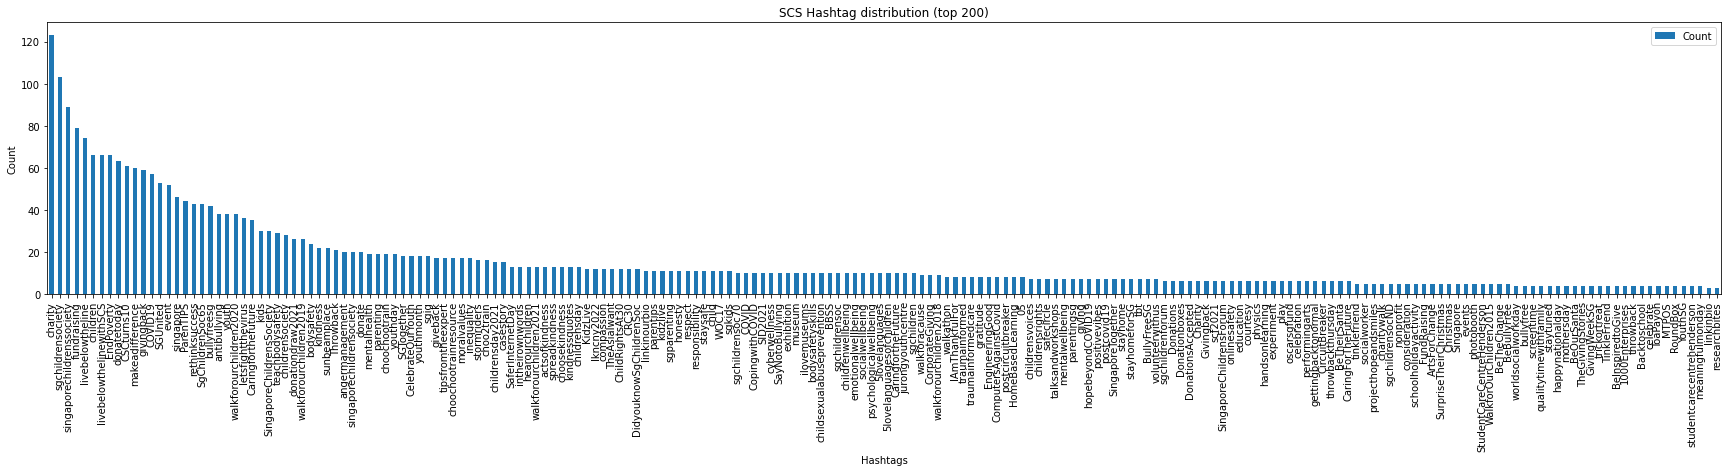

In [36]:

hashtagDF.head(200).plot(kind="bar", title="test", x = "Hashtag", figsize=(30,5))
# ax = hashtagDF.plot.bar(x='Hashtag', y='Count', rot=0)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("SCS Hashtag distribution (top 200)")
plt.xlabel("Hashtags")
plt.ylabel("Count")



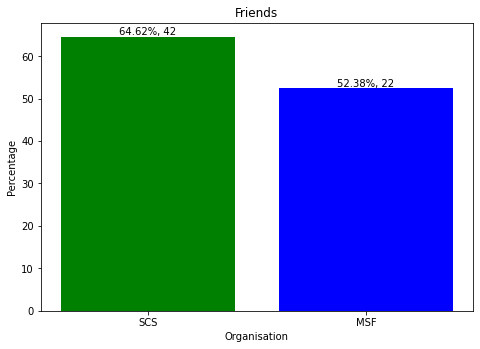

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
org = ['SCS', 'MSF']
Followers = [64.62, 52.38]
followers_count = [42,22]
ax.bar(org, Followers, color=['green', 'blue'])

for i in range(len(Followers)):
    plt.annotate(str(Followers[i]) + f"%, {followers_count[i]}", xy=(org[i],Followers[i]), ha='center', va='bottom')

ax.set_title('Friends')
ax.set_ylabel('Percentage')
ax.set_xlabel('Organisation')
plt.show()

In [38]:
taggedpostDF.loc[:,['username','likeCount','commentCount','description','postUrl']].sort_values(by=['likeCount'], ascending=False).head()

,username,likeCount,commentCount,description,postUrl
91,malaquemahdaly,5096,6,"My dearest girl here means the world to me. She lights up my life with her laughter and easy-going nature. She really taught me to be a lil more forgiving and that happiness is in the little everyday things. \n\nShe gave me a new purpose in life that sparked my journey to be healthier and more energetic as I grow older every day, so that I can spend more precious quality time with her and her brother.\n\nSpeaking of purpose, @charleskeithofficial came up with the Purpose Collection as seen on both of our feet. Thoughtfully made with materials that are kinder on our planet, these are shoes that will not only make a fashion statement, but also express an eco-conscious stance. They are also made of 85% earth-friendly materials, including organic chemical-free cotton and certified recycled thermoplastic rubber. \n\nIf you're passionate about giving back, whether it's to the earth or to society, we can also help to give back to the needy children that Singapore Children’s Society supports.\n\nSign up for a @PayPal Singapore account, and when you shop on CHARLES & KEITH’s website (children’s shoes included), @paypal will donate 3% of your transaction to @sgchildrensoc . This is such a sweet gesture. Just imagine the smiles on the children’s faces. :)\n\nShop at many other merchants, including @bedandbasics to give back! Visit paypal.com/sg/givebackMM to find out more.\n\n#PayPalGiveBack #ad\n#CharlesKeithOfficial #CharlesKeithGabine",https://www.instagram.com/p/CR-l66vJ96l/
98,poojakawatra,3436,69,"Have you ever felt that you are struggling with your feelings?? Keeping a smile on your face but a lot going inside??\n\nMental health is something we all speak about once something unfortunate has happened & keep stressing to speak out our hearts but we need someone who can sit, talk to us, assure us and not judge us for what we are going through at the moment.\n\nChildhood trauma, depression, Sexual abuse is on the rise and almost 64% of people of Singapore have experienced a traumatic event during the first 18 years of their lives. \n\nMost of the time people are so confused to talk about it. \n\nSeven local agencies focusing on community-based mental health services for children and youth - Acceset, Boys’ Town, Campus PSY, Caregivers Alliance Limited, Limitless, Singapore Association for Mental Health, and Singapore Children’s Society - have come together to launch Safe Circle. \n\n@safecircle.sg is a platform that aims to shed light on the different forms of trauma. For anyone who would like to find out more about trauma-informed care, Safe Circle offers complimentary programs and workshops as well! \n\nFor anyone out there reading this, who needs a listening ear or looking for a platform that helps in coping with any form of trauma, @SafeCircle.SG is here for you. \n\nJust to tell you that YOU are not ALONE in this.. \n\n#SafeCircleSG #poojakawatra",https://www.instagram.com/p/CRgrKbnlgDh/
121,ruchyii_soul,2008,48,"I was honoured to be invited to share my personal experience and journey as a Professional Esports Player with VOX @ Children's Society.\n\nA youth drop-in centre focusing on preventive and developmental needs through healthy recreational activities in which fun and social work intersect. VOX reaches out to youth aged between 13 to 18, underpinned by the Positive Youth Development framework to build on 5Cs - Confidence, Connection, Character, Competence and Caring. \n\nAt the time, they were having an in-house tournament for Mobile Legends and youths were enthusiastic to ask me questions in hopes to seek advice to improve their gaming strategies. \nApart from sharing my experiences of being a professional player and in-game knowledge, I wanted to highlight the positive aspects of gaming alongside the transferable skills that you are able to cultivate through gaming.\n\nOne lucky youth received the upcoming EVOS Esports Singapore Team's Jersey a

In [39]:

trydate = postDF["pubDate"].tolist()[0]
print(trydate)
df_date = pd.to_datetime(postDF["pubDate"])

2022-03-22T03:23:22.000Z


# Create Json object for Lambda Amazon #

In [13]:
# Comment array
data = commentDF[commentDF["comment"].notna()]["comment"].tolist()
print(data[:5])

['👏👏', '@cherylongkx @cool_zillavince', 'Congratulations on 70 years! 💪✨', 'Thank you for the memories. It was an honour to have worked as a teacher there. @nsd_be', 'Hi @sgchildrensoc pls check dm thank you']


In [79]:
import json
with open('MSF_comments.json', 'w') as f:
    json.dump(data, f, indent=4)
    
# import json
# with open('data.json', 'w', encoding='utf-8') as f:
#     json.dump(data, f, ensure_ascii=False, indent=4)

## AWS result ##

In [14]:
import json
with open("./aws/SCS_comments.json.json", 'r') as f:
    jsonData = json.load(f)

print(jsonData[0])

{'Sentiment': 'NEUTRAL', 'SentimentScore': {'Positive': 0.03435271978378296, 'Negative': 0.003817102639004588, 'Neutral': 0.9475383162498474, 'Mixed': 0.014291895553469658}, 'ResponseMetadata': {'RequestId': '6c1e7217-e5fd-4a11-aa6b-65a1381dc0e6', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '6c1e7217-e5fd-4a11-aa6b-65a1381dc0e6', 'content-type': 'application/x-amz-json-1.1', 'content-length': '163', 'date': 'Wed, 23 Mar 2022 04:51:47 GMT'}, 'RetryAttempts': 0}}


In [15]:
print(len(jsonData))
resultDict = {}
resultDict["comment"] = data
resultDict["sentiment"] = list(map(lambda x : x["Sentiment"] , jsonData))
resultDict["positiveScore"] = list(map(lambda x : x["SentimentScore"]["Positive"] , jsonData))
resultDict["negativeScore"] = list(map(lambda x : x["SentimentScore"]["Negative"] , jsonData))
resultDict["neutralScore"] = list(map(lambda x : x["SentimentScore"]["Neutral"] , jsonData))
resultDict["mixedScore"] = list(map(lambda x : x["SentimentScore"]["Mixed"] , jsonData))

sentimentDF = pd.DataFrame(resultDict)
sentimentDF.head(10)

237


,comment,sentiment,positiveScore,negativeScore,neutralScore,mixedScore
0,👏👏,NEUTRAL,0.034353,0.003817,0.947538,0.014292
1,@cherylongkx @cool_zillavince,NEUTRAL,0.020442,0.001561,0.976628,0.001369
2,Congratulations on 70 years! 💪✨,POSITIVE,0.998805,0.000073,0.001095,0.000026
3,Thank you for the memories. It was an honour to have worked as a teacher there. @nsd_be,POSITIVE,0.995531,0.000090,0.004326,0.000053
4,Hi @sgchildrensoc pls check dm thank you,POSITIVE,0.750932,0.002515,0.240925,0.005629
5,Promote it on @Mentalhealth_.community,NEUTRAL,0.004531,0.000248,0.995198,0.000023
6,Hope you guys enjoyed the game! #RiseandRoar #ONESTRONG,POSITIVE,0.991214,0.000138,0.008571,0.000077
7,"only took part in a few activities conducted by scs, but they were really fun :)",POSITIVE,0.993079,0.000325,0.002811,0.003785
8,One of the children in CC1. There since 3yrs old to 12 yrs old.,NEUTRAL,0.017452,0.005333,0.977102,0.000113
9,Can send the recording link to rewatch this event again,NEUTRAL,0.148147,0.032190,0.812657,0.007006


In [16]:
sentimentDF["sentiment"].value_counts()

POSITIVE    113
NEUTRAL     111
NEGATIVE     12
MIXED         1
Name: sentiment, dtype: int64

In [17]:
display(sentimentDF.loc[sentimentDF["sentiment"] == "NEGATIVE", "comment"].to_frame())
display(sentimentDF.loc[sentimentDF["sentiment"] == "NEUTRAL", "comment"].to_frame().head())
display(sentimentDF.loc[sentimentDF["sentiment"] == "POSITIVE", "comment"].to_frame().head())

,comment
14,can live stream this talk on your facebook. then i will not rsvp
18,I feel very sad today because I wanted to wear a ear ring for my first time but my parents don't allow me what can I do to make my parents allow 😔😢
24,Hit your head on the wall. Don’t hit your children
79,This looks like an session.
104,I hope for a healthier Singapore with lower cases of COVID-19.
107,"My children got kidnaped for abductions for sex trafficking or sex exploration , that’s why I am ver pathetic as the terrorists from terrorism challenges me with bestiality !"
126,Awww 😢😢😢😢 So Sad
137,Link is not clickable
162,Thats meh
182,Hi Children Society! Was an hr late for Minister Chan's Lecture. Missed out the important part. Will you be sharing the video coverage or post the writeup coverage?


,comment
0,👏👏
1,@cherylongkx @cool_zillavince
5,Promote it on @Mentalhealth_.community
8,One of the children in CC1. There since 3yrs old to 12 yrs old.
9,Can send the recording link to rewatch this event again


,comment
2,Congratulations on 70 years! 💪✨
3,Thank you for the memories. It was an honour to have worked as a teacher there. @nsd_be
4,Hi @sgchildrensoc pls check dm thank you
6,Hope you guys enjoyed the game! #RiseandRoar #ONESTRONG
7,"only took part in a few activities conducted by scs, but they were really fun :)"


# Time-series #
- https://plotly.com/python/time-series/
- https://pythonguides.com/matplotlib-time-series-plot/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
- https://ourcodingclub.github.io/tutorials/pandas-time-series/

In [40]:
df_posttime = postDF.groupby("postUrl").agg({'likeCount': 'mean', 'viewCount': 'mean', 'pubDate':'first'}).rename(columns={'likeCount': 'likeMean','viewCount': 'viewMean'}).reset_index()
df_posttime["pubDate"] = pd.to_datetime(df_posttime["pubDate"])

In [41]:
df_posttime.isna().sum()
# df_posttime.plot.line(x='pubDate', y='likeMean')
# .groupby(pd.Grouper(freq='M'))
df_posttime = df_posttime.groupby(pd.Grouper(key="pubDate",freq='M')).sum().reset_index()

,pubDate,likeMean,viewMean
63,2020-10-31 00:00:00+00:00,967.0,980.0
51,2019-10-31 00:00:00+00:00,901.0,471.0
79,2022-02-28 00:00:00+00:00,724.0,142.0
57,2020-04-30 00:00:00+00:00,717.0,704.0
62,2020-09-30 00:00:00+00:00,666.0,1110.0


<AxesSubplot:>

,pubDate,likeMean,viewMean
63,2020-10-31 00:00:00+00:00,967.0,980.0
51,2019-10-31 00:00:00+00:00,901.0,471.0
79,2022-02-28 00:00:00+00:00,724.0,142.0
57,2020-04-30 00:00:00+00:00,717.0,704.0
62,2020-09-30 00:00:00+00:00,666.0,1110.0


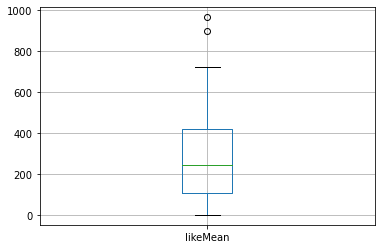

In [42]:
# display(df_posttime.boxplot(column=['likeMean']))
display(df_posttime.sort_values(by=['likeMean'], ascending=False).head())


# df_posttime.drop([226,230], inplace = True)
display(df_posttime.boxplot(column=['likeMean']))
display(df_posttime.sort_values(by=['likeMean'], ascending=False).head())

(0.0, 1000.0)

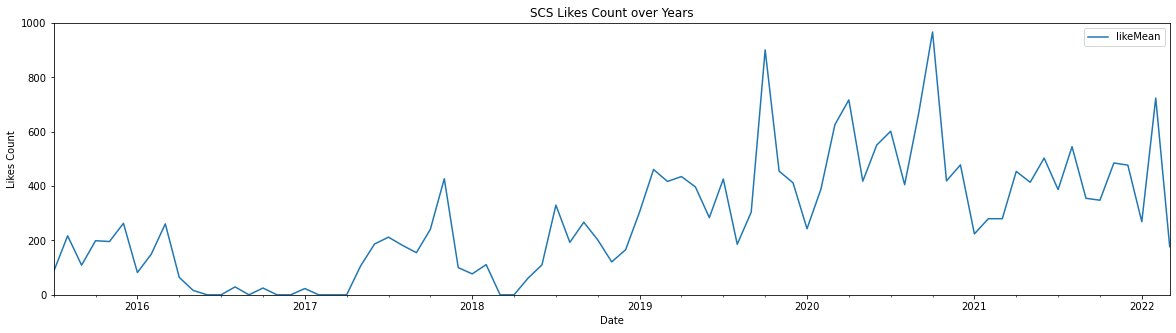

In [51]:
# df_posttime.plot(figsize=(15,4))
# df_posttime.plot(subplots=True, figsize=(15,6))
# df_posttime.plot(y=["likeMean", "ViewMean"], figsize=(15,4))
# df_posttime.plot(x="pubDate", y=["likeMean", "ViewMean"], style='.')
df_posttime.plot.line(x='pubDate', y=['likeMean'], figsize=(20,5))
plt.title("SCS Likes Count over Years")
plt.xlabel("Date")
plt.ylabel("Likes Count")
plt.ylim ((0, 1000))

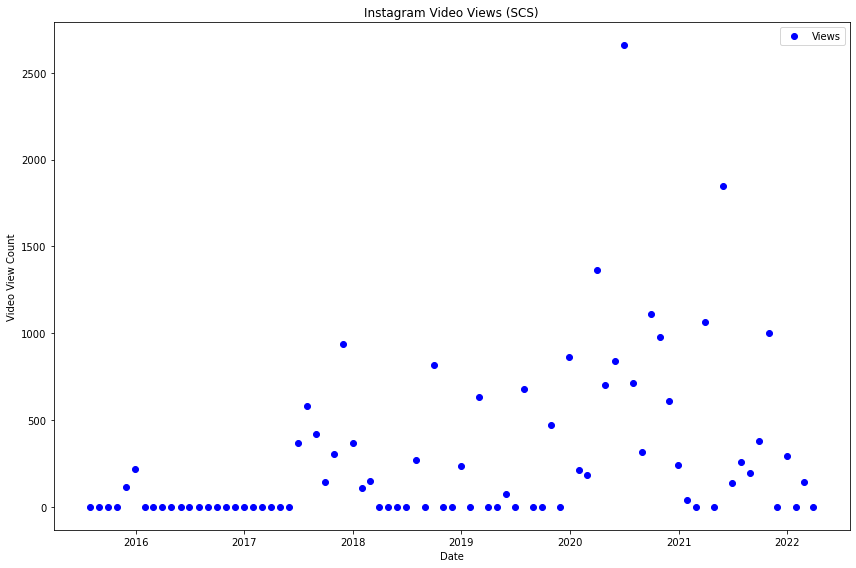

In [50]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(12, 8))
# plt.plot_date(df_posttime.pubDate, df_posttime.likeMean,'-o' , label='Likes', linewidth=3)
plt.plot_date(df_posttime.pubDate, df_posttime.viewMean, label='Views', linewidth=3, color = "b")

plt.title('Instagram Video Views (SCS)')
plt.xlabel('Date')
plt.ylabel('Video View Count')

plt.legend()
plt.tight_layout()
plt.show()

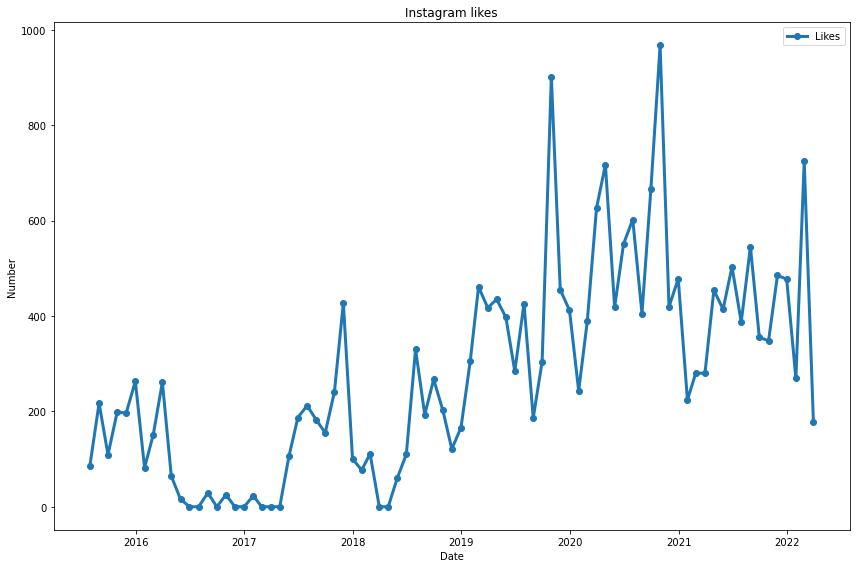

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.plot_date(df_posttime.pubDate, df_posttime.likeMean,'-o', label='Likes', linewidth=3)
# plt.plot_date(df_posttime.pubDate, df_posttime.viewMean, label='Views', linewidth=3)

plt.title('Instagram likes')
plt.xlabel('Date')
plt.ylabel('Number')

plt.legend()
plt.tight_layout()
plt.show()

# Download all photos (Don't run first haha) #

In [38]:
# Download
statsDictionary["followerDp"] = followerDF["imgUrl"].tolist()
statsDictionary["followingDp"] = followingDF["imgUrl"].tolist()

print(f'Download check: {len(statsDictionary["followerDp"]) == len(statsDictionary["follower"])}')
print(f'Download check: {len(statsDictionary["followingDp"]) == len(statsDictionary["followering"])}')


Download check: (11698, 11698)
Download check: True


In [ ]:
# Download
for i in range(len(statsDictionary["followerDp"])):
    urllib.request.urlretrieve( statsDictionary["followerDp"][i], './photos/followers/{}.jpg'.format(statsDictionary["follower"][i]))

for i in range(len(statsDictionary["followingDp"])):
    urllib.request.urlretrieve( statsDictionary["followingDp"][i], './photos/followerings/{}.jpg'.format(statsDictionary["followering"][i]))

